# Decision Trees

## Load data

In [12]:
import pandas as pd

df = pd.read_csv('data/diabetes.csv')

## Data analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [16]:
cl = 'Outcome'

y = df[cl]
X = df.drop(cl, axis=1)

X.corrwith(y).abs().sort_values(ascending=False)

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

The two features with the highest absolute correlation with the target __Outcome__ are __Glucose__ and __BMI__.

## Model Training

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = ['Glucose', 'BMI']
X = df[features]
y = df[cl]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  
logreg = LogisticRegression()
dt = DecisionTreeClassifier()

logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_pred_dt = dt.predict(X_test)

acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_dt = accuracy_score(y_test, y_pred_dt)

print('Logistic Regression: {:.2f}'.format(acc_logreg))
print('Decision Tree: {:.2f}'.format(acc_dt))

Logistic Regression: 0.74
Decision Tree: 0.68


## Decision Surface

/home/vornic/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/vornic/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


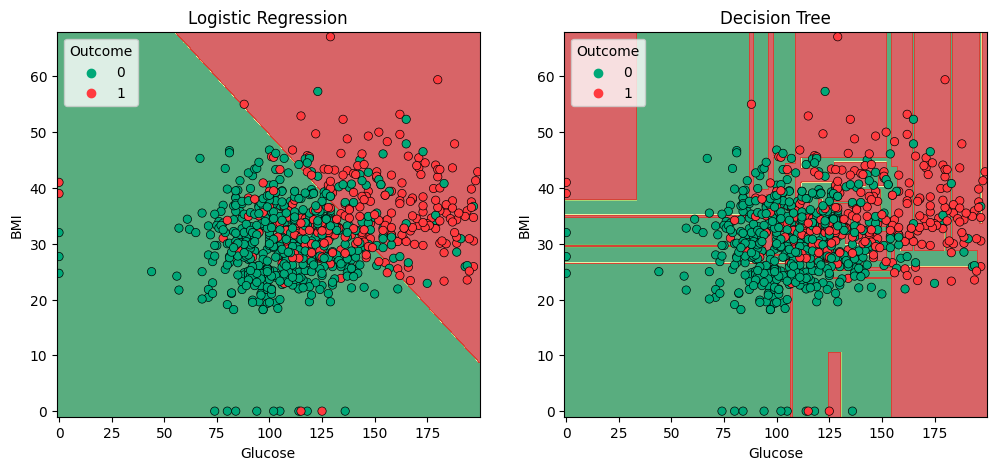

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bounds of the domain
min1, max1 = X['Glucose'].min() - 1, X['Glucose'].max() + 1
min2, max2 = X['BMI'].min() - 1, X['BMI'].max() + 1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))

y_pred_logreg = logreg.predict(grid)
zz_logreg = y_pred_logreg.reshape(xx.shape)

y_pred_dt = dt.predict(grid)
zz_dt = y_pred_dt.reshape(xx.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].contourf(xx, yy, zz_logreg, cmap='RdYlGn_r', alpha=0.7)
ax[0].set_title('Logistic Regression')

ax[1].contourf(xx, yy, zz_dt, cmap='RdYlGn_r', alpha=0.7)
ax[1].set_title('Decision Tree')

for i in range(2):
    ax[i].set_xlabel('Glucose')
    ax[i].set_ylabel('BMI')
    sns.scatterplot(x='Glucose', y='BMI', hue=cl, data=df, edgecolor='k', ax=ax[i])

plt.show()

### Conclusion

For logistic regression, the decision surface is a linear boundary. Some of the points from class 0 are misclassified as class 1, and vice versa.
The data cannot be perfectly separated by a linear boundary, since there is some overlap between the two classes.

For decision trees, the decision surface is a non-linear boundary. Due to the nature of the data points, the decision surface still does not perfectly separate the two classes. In some regions, it does so better than the linear boundary. Still, it has a lower accuracy than the logistic regression model.

## Decision Tree Model

### Hyperparameter tuning

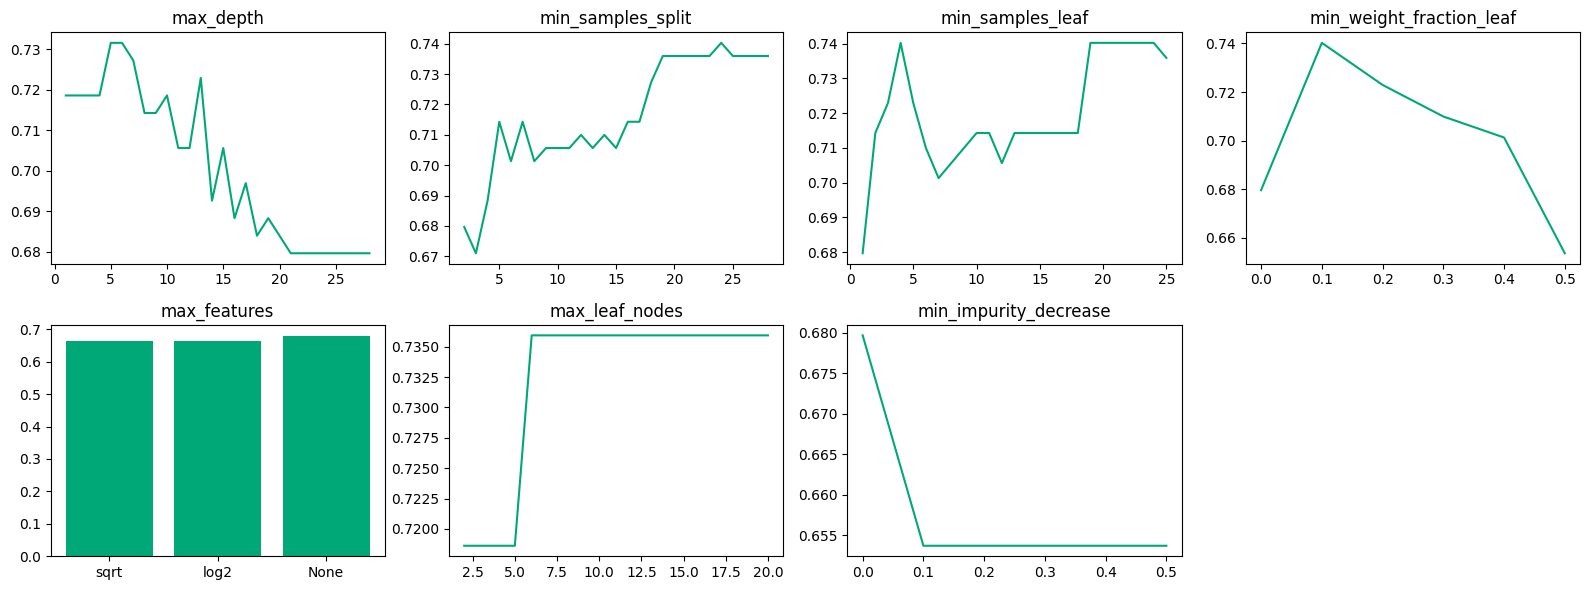

In [19]:
from sklearn.tree import DecisionTreeClassifier

params_dict = {
    'max_depth': range(1, 29),
    'min_samples_split': range(2, 29),
    'min_samples_leaf': range(1, 26),
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': range(2, 21),
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
}

results = {}
best_params = {}

for hyperparameter in params_dict:
    best_accuracy, best_value = 0, None

    for value in params_dict[hyperparameter]:
        clf = DecisionTreeClassifier(random_state=42, **{hyperparameter: value})
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_value = value

        if hyperparameter not in results:
            results[hyperparameter] = {'values': [], 'accuracy': []}

        results[hyperparameter]['values'].append(value)
        results[hyperparameter]['accuracy'].append(accuracy)

    best_params[hyperparameter] = best_value


fig, axes = plt.subplots(2, 4, figsize=(16, 6))
axes = axes.ravel()
for i, hyperparameter in enumerate(params_dict):
    if hyperparameter == 'max_features':
        continue
    values = results[hyperparameter]['values']
    accuracy = results[hyperparameter]['accuracy']
    axes[i].plot(values, accuracy)
    axes[i].set_title(hyperparameter)

axes[4].bar(['sqrt', 'log2', 'None'], results['max_features']['accuracy'])
axes[4].set_title('max_features')
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

- max_depth

max_depth determines the maximum depth of the tree. it reaches its optimum value at 5, after which the accuracy decreases in jerky steps.

- min_samples_split

min_samples_split determines the minimum number of samples required to split an internal node. it reaches its optimum value at 24. Up to this value, the accuracy increases in jerky steps. After that, the accuracy decreases for a short while, and then remains constant.

- min_samples_leaf

min_samples_leaf determines the minimum number of samples required to be at a leaf node. it results in the highest accuracy at 4. A close seems to be around 20, but the accuracy is slightly lower.

- min_weight_fraction_leaf

min_weight_fraction_leaf determines the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. min_weight_fraction_leaf results in the highest accuracy at 0.1, after which the accuracy decreases.

- max_features

max_features determines the number of features to consider when looking for the best split. The options are: None, auto, sqrt, log2, but auto has been deprecated. The bar chart shows that the accuracy is highest for max_features set to _None_. Overall, for the other values, the accuracy is not extremely different.

- max_leaf_nodes

max_leaf_nodes determines the maximum number of leaf nodes. It is obvious that the accuracy increases fast at max_leaf_nodes = 6, after which it remains constant.

- min_impurity_decrease

min_impurity_decrease determines the minimum impurity decrease required for a split. Evidently, the accuracy is highest for min_impurity_decrease = 0.0. The accuracy decreases for higher values.

In [20]:
best_params

{'max_depth': 5,
 'min_samples_split': 24,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'max_features': None,
 'max_leaf_nodes': 6,
 'min_impurity_decrease': 0.0}

### Model training

In [21]:
# Model with the default parameters
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.6796536796536796

In [22]:
# Model with the best parameters
clf = DecisionTreeClassifier(random_state=42, **best_params)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7402597402597403

For all hyperparameters, the lowest possible accuracy is around 0.65, which is close to the accuracy of the model with default hyperparameters (0.679).
Selecting the best hyperparamters lead to an increase in accuracy from 0.679 to 0.74.

### Tree visualization

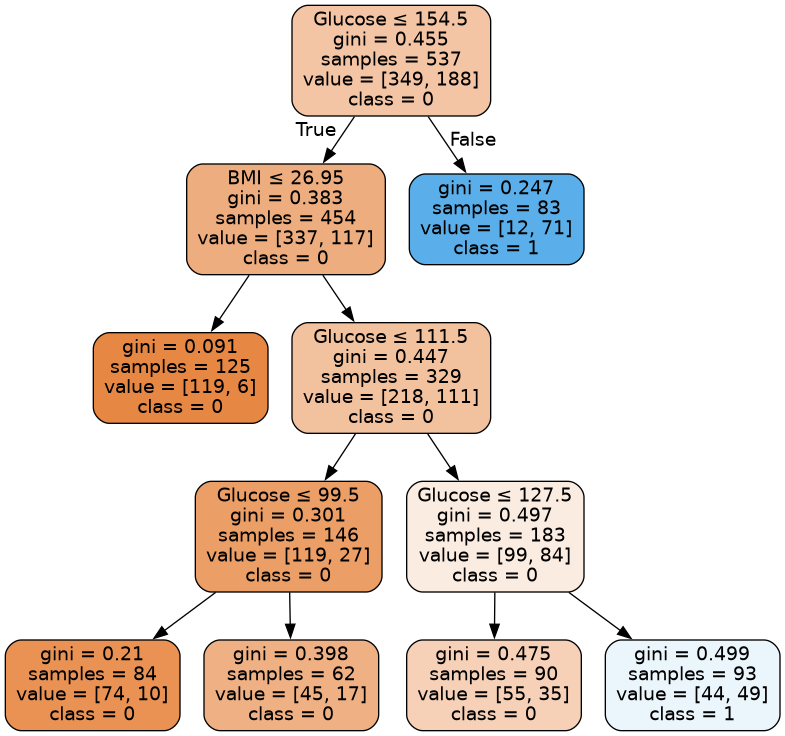

In [12]:
from sklearn.tree import export_graphviz
from IPython.display import Image

export_graphviz(clf, out_file='tree.dot', feature_names=X_train.columns, class_names=['0', '1'], 
				filled=True, rounded=True, special_characters=True)

# Convert the tree.dot file to a PNG image using the command-line.
# !dot -Tpng tree.dot -o tree.png -Gdpi=600

Image(filename='tree.png')